In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import random 

class DNA(): 
    def __init__(self, content):
        self.content = content 

    def cross_over(self, dna, split_point):
        newContent =[ " " for i in range(len(self.content))]
        for i in range(0, len(self.content)-1): 
            if (i <= split_point):
                newContent[i] = self.content[i]
            else:  
                newContent[i] = dna.content[i]
        return DNA(''.join(newContent))

    def mutate(self, mutationRate, materials):
        # mutation
        self.content = list(self.content)
        for i in range(len(self.content)):
            rate = random.random()
            if rate < mutationRate:
                r = random.randint(0, len(materials)-1)
                self.content[i] = materials[r]  
        self.content = ''.join(self.content)
    

    def compare_to(self,content):
        count = 0 
        for index, value in enumerate(content):
            if value == self.content[index]:
                count +=1 
        # print("count",content, self.content, count)
        return count 
         

In [0]:
# from DNA import DNA 
# !pip install fuzzywuzzy
import random
import copy
from fuzzywuzzy import fuzz
class GenerateADN(object):

    def __init__(self, target="",  nPopulation=0, mutation_rate=0.01):
        self._target = target
        self._materials = ""
        self.nPopulation = nPopulation
        self._mutation_rate = mutation_rate 
        self._population = []
  
    def create_materials(self):
        materials = []
        for i in range(26): 
            materials.append(chr(97+i))  
        materials.append(' ')
        self._materials = ''.join(materials)

    def init_population(self):  
        for i in range(self.nPopulation): 
          content =[ " " for i in range(len(self._target))]
          for j in range(len(self._target)):
              r = random.randint(0, len(self._materials)-1) 
              content[j] = self._materials[r]  
          self._population.append(DNA(''.join(content)))  
         
    def create_mating_pool(self):
        fProportion = []
        su = 0
        # print(fuzz.token_sort_ratio(self._population[0].content,self._target))
        # print(self._target,self._population[0].content)
        for i in range(len(self._population)):
            fitness = self._population[i].compare_to(self._target)
            # fitness = fuzz.token_sort_ratio(self._population[i],self._target)
            for j in range(fitness):
                fProportion.append(i)

        # print(fProportion)
        return fProportion  
 
    def evole_once(self):
        score=[]
        pool = self.create_mating_pool()  
        for i in range(len(self._population)):
            p1 = self._population[pool[random.randint(0,len(pool)-1)]]
            p2 = self._population[pool[random.randint(0,len(pool)-1)]]
            # print(p1.content, p2.content)
            split_point = random.randint(0, len(self._target) -2 ) + 1
            new_dna = p1.cross_over(p2, split_point)
            # print(new_dna.content)
            new_dna.mutate(self._mutation_rate, self._materials)
            # print(new_dna.content)
            self._population[i] = new_dna
            # print("mutate after",new_dna.content, self._target)
            score.append(new_dna.compare_to(self._target))
            if new_dna.compare_to(self._target) == len(self._target): 
                return new_dna, len(self._target)
        return None,max(score)

    def replace_str_index(self, text,index=0,replacement=''):
        return '%s%s%s'%(text[:index],replacement,text[index+1:])

if __name__ == "__main__": 
    _target = "thay than dep trai ti" 
    print("Target :",_target, len(_target))
    _nPopulation = 2000
    ga = GenerateADN(_target, _nPopulation) 
    ga.create_materials()
    ga.init_population()
    count = 0
    last_dna = None
    while(True):
        count +=1
        dna, _max = ga.evole_once() 
        if count%1000 == 0:
            print("count: ",count,_max)
        if dna != None:
            print("Evolution {0}: New DNA = {1}".format(count, dna.content))
            break
           

Target : thay than dep trai ti 21
count:  1000 20
Evolution 1537: New DNA = thay than dep trai ti


In [0]:
fit ness phan bo =>quan the= [1 ... 4]
target = [A B C D]


so luong ca the phai <= 2^(n(dia diem) - 1) : 1 la diem bat dau
tien hoa: => 
      ca the thu i so voi target => bao nhieu diem  (beam search)
 

heuristic là beam_search() trả về giá trị đường đi ngắn nhất

1 [A B D C] => 0.7
2 [A C B D] => 0.5
3 [A C D B] => 0.3
4 [A B C D] => 1 

fitness [
    3 so 3
    5 so 2
    7 so 1
    10 so 4
]


value_random = fitness[random(len(fitness))]
p1 = quan the [value_random]

value_random = fitness[random(len(fitness))]
p2 = quan the [value_random]

=> [A B C D]


In [0]:
- Cá thể: schedule 
- Quần thể: tập hợp schedule 
- Lai: schedule tốt hơn 
- Biến dị: random 

In [0]:

class State:
    global map_dict
    def __init__(self, name, value, weight):
        self.name = name 
        self.weight = weight
        self.value = value
        
    def get_value(self):
        return self.value

    def get_weight(self):
        return self.weight
     
    def print(self):
        print("name",self.name,"value",self.value,"weight",self.weight)
      
class BeamSearch(object):

      # Total la so khoang cach (km) co the di cua nguoi giao hang
      # map_dict {'ten dia diem':["gia tri mon hang", "khoang cach cua cho giao doi voi nguoi giao hang"]}
      # khii giao hang phai tuan thu theo gia tri mon hang cao thi phai duoc giao truoc, neu hai gia tri nhu nhau thi so sanh ben nao co khoang cach ngan hon thi di truoc

  def __init__(self, TOTAL, map_dict, k):
      self.TOTAL = TOTAL
      self.map_dict = map_dict
      self.fringe = [] 
      self.visited = []
      self.k = k

  def init_state(self):
      for key, value in map_dict.items():
        self.fringe.append(State(name=key,value=value[0],weight=value[1])) 
  

  def search(self): 
      while(len(self.visited) < len(self.map_dict.items())):
          # lấy ra nhỏ nhất   
          if(len(self.fringe)==0):break
              
          # lấy ra state có VALUE LỚN NHẤT để đi 
          state = max(self.fringe, key=lambda x: int(x.value))
          self.visited.append(state.name)  
          # print("value lấy được",state.get_value(),"trọng lượng balo",state.get_weight())
          # xoá fringe 
          self.fringe = [] 
          
          # tìm ra những state chưa đi 
          temp = dict(self.map_dict)
          for item in  self.visited:
              temp.pop(item, None)
              
          # tìm next_state có thể đi 
          # đảm bảo weight <= TOTAL
          possible_state = []
          for i in range(len(self.map_dict.items())):
              if len(temp.items()) > 0:
                  # lấy ra state có GIÁ TRỊ LỚN NHẤT ĐỂ đưa vào possible move 
                  name_state_min = max(temp, key=lambda x: self.map_dict[x][0])
                  temp.pop(name_state_min, None)  
                  if state.weight + int(self.map_dict[name_state_min][1]) <= TOTAL:  
                      possible_state.append(name_state_min)
              
          # sắp xếp theo weight tăng dần 
          possible_state.sort(key=lambda x:  self.map_dict[x][1] + state.get_weight())
          # print('\t\tvisited',visited,'possible_state',possible_state[:k],'\n')
          # print(possible_state)
          # fringe sẽ chưa K state có thể đi tiếp  
          for count, next_state in enumerate(possible_state):   
              if count > k: break
              self.fringe.append(State(name=next_state, 
                                  value=self.map_dict[next_state][0] + state.get_value(), 
                                  weight=self.map_dict[next_state][1] + state.get_weight()))
      return self.visited
               


In [0]:
class Schedule():

  def __init__(self, path):
    self.path = path

  def lai_tao(self, lover, len_target, method):
    if method == "single":
      split_point = random.randint(0, len_target -2 ) + 1
      new_path =[ " " for i in range(len(self.path))]
      for i in range(0, len(self.path)): 
          if (i <= split_point):
              new_path[i] = self.path[i]
          else:  
              new_path[i] = lover.path[i]
      return Schedule(new_path)
  def bien_di(self, materials, ratio_bien_di):
    for i in range(1, len(self.path)):
      rate = random.random()
      if rate < ratio_bien_di:
          r = random.randint(0, len(materials)-1)
          self.path[i] = materials[r]   
         
  def danh_gia(self, target):
    score = 0
    for index, value in enumerate(target):
      if target[index] == self.path[index]:
        score+=1
    return score


In [0]:
from collections import Counter
class GA(object):

  def __init__(self, target, N_population, ratio_bien_di, alpha):
    self.target = target 
    self.ratio_bien_di = ratio_bien_di
    self.population = [] 
    self.alpha = 1+alpha
    if N_population > 2**len(self.target):
      print("vì số lượng cá thể lớn hơn số lượng có thể sinh ra từ target cho nên phải giới hạn số lượng")
      self.N_population= 2**len(self.target) 
    else:
      self.N_population = N_population

  def khoi_tao_nhung_dia_diem_ban_dau(self):
    self.materials = [self.target[0]]
    self.materials.extend(sorted(self.target[1:]))
     
  def khoi_tao_dan_so(self):
    for i in range(self.N_population):
      path = [ " " for i in range(len(self.target))]
      path[0] = self.target[0]
     
      for j in range(1,len(self.target)):
        r = random.randint(0, len(self.materials)-1) 
        while(self.materials[r] in path):
          r = random.randint(0, len(self.materials)-1) 
        path[j] = self.materials[r]
      self.population.append(Schedule(path))

  def tinh_fitness(self):
    f = []
    for i in range(self.N_population):
      fitness = self.population[i].danh_gia(self.target)
      for j in range(int(fitness*self.alpha)):
        f.append(i)
    return f 
 
  def tien_hoa_1_lan(self): 
    method = "single"
    score = []
    pool_fitness = self.tinh_fitness()
    for i in range(self.N_population):
      parent_1 = self.population[pool_fitness[random.randint(0,len(pool_fitness)-1)]]
      parent_2 = self.population[pool_fitness[random.randint(0,len(pool_fitness)-1)]] 
      
      new_schedule = parent_1.lai_tao(parent_2, len(self.target), method)
      new_schedule.bien_di(self.materials,self.ratio_bien_di)
      # print(new_path.path)
      self.population[i] = new_schedule

      score.append(new_schedule.danh_gia(self.target))
      if score[-1] == len(self.target):
        return new_schedule, score[-1]
    # print(self.population[0].path)
    return None, score


  def tien_hoa(self):
    count =0 
    while(True):
      count +=1
      schedule, score = self.tien_hoa_1_lan() 
      if count%1000 == 0:
        print(Counter(score))
        print("count: ",count,"max :",max(score))
      if schedule != None:
        print("Evolution {0}: New PATH = {1}".format(count, schedule.path))
        break
           

In [0]:

map_dict = {
    'A':[4,12],
    'B':[2,6],
    'C':[10,4],
    'D':[1,1],
    'E':[2,3],
    'F':[1,13],
    'G':[6,2],
    'H':[3,4],
    'M':[2,2],
    'N':[4,1],
    'T':[9,4],
    'S':[11,14],
    # 'P':[3,1]
} 

bs = BeamSearch(TOTAL=9999, map_dict=map_dict,k=3)
bs.init_state() 
target = bs.search()
N_population = 1000
ga = GA(target, N_population, ratio_bien_di=0.1, alpha=0) 
ga.khoi_tao_nhung_dia_diem_ban_dau()
ga.khoi_tao_dan_so()
print(ga.N_population, "Target:", ga.target)
ga.population[0].path
ga.tien_hoa()

1000 Target: ['S', 'G', 'C', 'T', 'N', 'H', 'A', 'M', 'E', 'B', 'D', 'F']
Counter({4: 252, 3: 236, 5: 203, 2: 114, 6: 102, 7: 45, 1: 37, 8: 10, 9: 1})
count:  1000 max : 9
Evolution 1022: New PATH = ['S', 'G', 'C', 'T', 'N', 'H', 'A', 'M', 'E', 'B', 'D', 'F']


In [0]:


bs = BeamSearch(TOTAL=9999, map_dict=map_dict,k=3)
bs.init_state() 
target = bs.search()
N_population = 1000
ga = GA(target, N_population, ratio_bien_di=0.1,alpha=3) 
ga.khoi_tao_nhung_dia_diem_ban_dau()
ga.khoi_tao_dan_so()
print(ga.N_population, "Target:", ga.target)
ga.population[0].path
ga.tien_hoa()

1000 Target: ['S', 'G', 'C', 'T', 'N', 'H', 'A', 'M', 'E', 'B', 'D', 'F']
Counter({4: 260, 5: 238, 3: 218, 6: 110, 2: 101, 7: 36, 1: 27, 8: 8, 9: 2})
count:  1000 max : 9
Counter({4: 299, 5: 244, 3: 209, 6: 125, 2: 80, 7: 27, 8: 10, 1: 6})
count:  2000 max : 8
Counter({4: 266, 5: 219, 3: 209, 6: 134, 2: 102, 7: 42, 1: 19, 8: 8, 9: 1})
count:  3000 max : 9
Evolution 3268: New PATH = ['S', 'G', 'C', 'T', 'N', 'H', 'A', 'M', 'E', 'B', 'D', 'F']


In [7]:


%cd /content/drive/My Drive/AI/Genetic Graph

/content/drive/My Drive/AI/Genetic Graph


In [0]:
import numpy as np
import collections
import random 
import sys
import math

class Edge:

    def __init__(self,x,y,weight):
        self.x = x
        self.y = y
        self.weight = weight

class Matrix(object):

    def __init__(self, matrix_path, shortest_path): 
        self.matrix_edge = None
        self.list_edge = list()
        self.edges = collections.defaultdict(list)
        self.path = []
        self.visited = []
        self.distances = dict()
        self.start_point, self.end_point = 0, 0
        self.gene_path = []
        self.shortest_path = shortest_path
        self.matrix_path = matrix_path         
        self.__build()

    def __build(self):  
      self.create_matrix_edge()  
      self.create_list_edge() 

    def create_matrix_edge(self): 
      with open(self.matrix_path,'r') as fin:
        count = 0
        data = fin.readlines()
        self.NUM_MATRIX = int(np.array(data[2:]).shape[0])
        self.start_point = int(data[0]) # start 
        self.end_point = int(data[1]) # end  
        self.matrix_edge = np.zeros((self.NUM_MATRIX,self.NUM_MATRIX))  
        for i in data[2:]:
            temp = str(i).split('\n')[0].split(' ')
            for j in range(len(temp)-1):
              self.matrix_edge[count,j] = temp[j]
            count+=1
        fin.close()

    def set_input(self, x, y): 
      self.start_point = int(x) # start 
      self.end_point = int(y) # end  

    def add_edge(self, from_node, to_node, distance):
      if to_node not in self.edges[from_node]:
        self.edges[from_node].append(to_node)
      if from_node not in self.edges[to_node]:
        self.edges[to_node].append(from_node)
      self.distances[(from_node, to_node)] = distance
      self.distances[(to_node, from_node)] = distance

    def create_list_edge(self):
        from_node = 0 
        for item in self.matrix_edge:
            to_node = 0 
            for ele in item:  
                if ele != -1:
                    self.add_edge(from_node, to_node, ele) 
                    self.list_edge.append(Edge(from_node,to_node,ele)) 
                to_node+=1 
            from_node+=1 

    def print_matrix_edge(self): 
        print("Graph :", self.NUM_MATRIX,"x",self.NUM_MATRIX)
        print(self.matrix_edge)

    def print_list_edge(self):
        for item in self.list_edge:
            print(item.x, item.y, item.weight)

    def dijsktra(self):  
        visited = {self.start_point: 0}
        path = {}  
        nodes = set(self.edges) 
        while nodes: 
            min_node = None
            for node in nodes:
                if int(node) in visited:
                    if min_node is None:
                        min_node = int(node)
                    elif visited[int(node)] < visited[min_node]:
                        min_node = int(node)

            if min_node is None:
                break
         
            nodes.remove(int(min_node))
            current_weight = visited[min_node]
  
            for edge in self.edges[min_node]:  
                weight = current_weight + self.distances[(int(min_node), int(edge))] 
                if edge not in visited or weight < visited[edge]:
                    visited[edge] = weight
                    path[edge] = min_node

        self.path = path
        self.visited = visited
        return visited, path

    def trace(self, is_print=False):  
        self.create_list_edge()   
        self.dijsktra()
        if is_print: self.print_matrix_edge() 
        
        cost = self.visited[self.end_point] 
        p = list()
        p.append(self.end_point)
        while self.path[p[-1]] != self.start_point: 
            p.append(self.path[p[-1]])
        p.append(self.start_point)
        with open(self.shortest_path,'w') as fout:
            st = ""
            for item in reversed(p):
                st += str(item)+"->"
            fout.write(st[:-2]+"\n") 
            fout.write(str(cost))
        return list(reversed(p))
 

    def trace_cross_all_point(self, is_print=False): 
      print("Target là ",self.start_point,self.end_point)
      print("Tìm tất cả đường đi từ đầu đến đích có số node bằng với tổng số node (",self.NUM_MATRIX ,") cần đi qua")
      self.get_all_path = list(self.dfs_paths(self.start_point, self.end_point)) 
      filter_NUM_MATRIX = list(filter(lambda x: len(x) == self.NUM_MATRIX ,self.get_all_path))  
      if len(filter_NUM_MATRIX) == 0:
        filter_NUM_MATRIX = list(filter(lambda x: len(x) >= self.NUM_MATRIX -1 ,self.get_all_path))  
      #   print(filter_NUM_MATRIX)
      sorted_NUM_MATRIX = list(sorted(filter_NUM_MATRIX, key=lambda y: self.get_value_of_path(y)))
      # print(len(sorted_NUM_MATRIX[0]))
      return sorted_NUM_MATRIX[0]

    def find_path_cross_all_point(self, is_print=False):
      filter_NUM_MATRIX = list(filter(lambda x: len(x) == self.NUM_MATRIX,self.get_all_path))
      return filter_NUM_MATRIX

    def dfs_paths(self, start, goal, path=None): 
      if path is None:
        path = [start] 
      if start == goal: 
        yield path
      for next in set(self.edges[start]) - set(path): 
        yield from self.dfs_paths(next, goal, path + [next]) 
    
    def print_all_path_M(self, u, d, visited, path): 
      # Mark the current node as visited and store in path 
      visited[u]= True
      path.append(u)  
      # If current vertex is same as destination, then print 
      # current path[] 
      if u == d:  
          self.gene_path.append(path.copy())
      else: 
          # If current vertex is not destination 
          #Recur for all the vertices adjacent to this vertex 
          for i in self.edges[u]: 
              if visited[i]==False: 
                  self.print_all_path_M(i, d, visited, path)  
      # Remove current vertex from path[] and mark it as unvisited 
      path.pop() 
      visited [u]= False 
      
      # Prints all paths from 's' to 'd' 
    def find_all_path(self, from_edge, to_edge):  
      visited =[False]*self.NUM_MATRIX  
      path = []   
      self.print_all_path_M(from_edge, to_edge, visited, path) 
      return self.gene_path

    def get_value_of_path(self, path):
      # print(path)
      value = 0
      for index, item in enumerate(path[:-1]):
        v = self.matrix_edge[item,path[index+1]] 
        if v > 0:
          value+= v
        else:  
          return -999
      return value
        

In [581]:
mt = Matrix(matrix_path = 'data_20_nodes.txt', shortest_path = 'shortest_path.txt')
print(mt.trace_cross_all_point())
# print("s")
#  for i in range(mt.NUM_MATRIX):
#    for j in range(mt.NUM_MATRIX):
 

# def my_function(x):
  # return list(dict.fromkeys(x)) 

Target là  0 13
Tìm tất cả đường đi từ đầu đến đích có số node bằng với tổng số node ( 20 ) cần đi qua
[0, 1, 9, 11, 10, 6, 19, 3, 18, 16, 15, 5, 12, 4, 14, 8, 2, 7, 17, 13]


In [0]:
class Schedule():

  def __init__(self, path):
    self.path = path
    self.index_like = []

  def tim_diem_giong(self, lover_path):
    index_like = []
    if len(self.path) <= len(lover_path):
      for index, item in enumerate(self.path):
        if item == lover_path[index]:
          index_like.append(index)
    else:
      for index, item in enumerate(lover_path):
        if item == self.path[index]:
          index_like.append(index)
    self.index_like = index_like[1:-2].copy()

  def lai_tao(self, lover, len_target, method):   
    new_path = [] 
    self.tim_diem_giong(lover.path)  
    if len(self.index_like) > 0:
      split_point = random.choice(self.index_like) 
      if method == "single":
        new_path.extend(self.path[:split_point])
        new_path.extend(lover.path[split_point:]) 

      # if method == "two":
        

      return Schedule(new_path)
    else:
      return Schedule(self.path)
 

In [0]:
from collections import Counter
import scipy.stats as ss

class GA(object):
  
  def __init__(self, N_population=150, ratio_bien_di= 0.01, alpha=0.5, input_path='data.txt', output_path='shortest_path.txt', algorithm="SP"): 
    self.ratio_bien_di = ratio_bien_di 
    self.alpha = alpha 
    self.mt = None
    self.input_path = input_path
    self.output_path = output_path 
    self.mt = Matrix(matrix_path = self.input_path, shortest_path = self.output_path)
    self.algorithm = algorithm

  def set_input(self, x, y):  
    self.mt.set_input(x, y)
 
  def khoi_tao_target(self, mode = 'choose_all'):
    self.population = [] 
    self.score_minimize = 9999
    self.number_change_score = 0
    self.path_maximize = []
    self.optimal_value = None 
    self.score = [9999] 
    self._min_score = 999999
    self.all_path = []
    self.mode = mode
    self.number_bien_di = 0
    if self.algorithm == "TSM":
      self.target = self.mt.trace_cross_all_point(is_print=False)
    if self.algorithm == "SP":
      self.target = self.mt.trace(is_print=False)
    print("Graph gồm", self.mt.NUM_MATRIX,"địa điểm\n")
    print("Phướng pháp chon lọc là:", self.mode)
    # if N_population > 2**len(self.target):
    #   print("vì số lượng dân số (cá thể) lớn hơn số lượng có thể sinh ra từ", len(self.target),"target cho nên phải giới hạn số lượng là", 2**len(self.target))
    #   self.N_population= 2**len(self.target) 
    # else:
    self.N_population = N_population  
    self.NUM_STABLE = N_population**2
    print("\nMục tiêu cá thể tốt nhất là:",self.target, self.danh_gia(Schedule(self.target))) 

  def khoi_tao_nhung_dia_diem_ban_dau(self):
    self.materials = [self.target[0]]
    self.materials.extend(sorted(self.target[1:]))
    print("Khởi tạo vật liệu di truyền thành công")
     
  def khoi_tao_dan_so(self):    
    print("Tìm tất cả đường đi từ đầu đến đích,", end = '')
    if self.algorithm == "TSM":
      self.all_path = list(self.mt.find_path_cross_all_point()).copy()
    if self.algorithm == "SP":
      self.all_path = list(self.mt.dfs_paths(self.target[0], self.target[-1])).copy() 
    print("tổng cộng",len(self.all_path) , "đường (cá thể) có thể lai từ đây")
    print("Khởi tạo đường đi hoàn tất", "tổng số cá thể trong quần thể là",self.N_population);
    if len(self.target) == 2: 
      print("Vì điểm bắt đầu và kết thúc kế nhau nên không cần tìm mà khởi tạo quần thể là chính đường đó")
      while len(self.population) < self.N_population:  
        self.population.append(Schedule(self.target.copy()))
    else:  
      while len(self.population) < self.N_population:  
        self.population.append(Schedule(random.choice(self.all_path).copy())) 

    print("Khởi tạo quần thể hoàn tất");

  def danh_gia(self, schedule): 
    path_current = schedule.path
    if len(path_current) == 0: return -9999
    path = [ int(vertice) for vertice in path_current ]
    score = self.mt.get_value_of_path(path)
    if score < 0: return score
  
    if path[-1] != int(self.target[-1]): 
      return score * 9989
    return score 

  def tinh_fitness(self):
    f = []  
    for i in range(len(self.population)):
      fitness = self.danh_gia(self.population[i])  
      f.append([fitness,i])  
    sorted_fitness = list(sorted(f, key=lambda x: x[0])) 
    if self.mode == 'choose_half_best':
      return sorted_fitness[:int(self.N_population/2)] 
    return sorted_fitness

  def tien_hoa_1_lan(self): 
    method = "single"  
    pool_fitness = self.tinh_fitness() 
    # print(pool_fitness)
    for i in range(len(self.population)):  
      parent_1 = self.population[random.choice(pool_fitness)[1]]
      parent_2 = self.population[random.choice(pool_fitness)[1]] 
      bien_di_ratio = random.random() 
      if bien_di_ratio > self.ratio_bien_di: 
        if len(list(set(parent_1.path) - set(parent_2.path))) != 0:
          new_schedule = parent_1.lai_tao(parent_2, len(self.target), method)
        else:  
          new_schedule = Schedule(parent_1.path) 
      else:   
        self.number_bien_di +=1
        new_schedule = Schedule(random.choice(self.all_path)) 
      self.population[i] = new_schedule
      self.score.append(self.danh_gia(new_schedule)) 
      # print(new_schedule.path,"tu thu","value =",self.score[-1])


      if self.score[-1] == self.score[-2]:
        self.number_change_score+= 1 
      else:
        self.number_change_score = 0
      if self.score[-1] > 0 and  self.score[-1] < self._min_score:
        self._min_score = min(self.score)
        # print(new_schedule.path, "self.path_maximize","value =",self.score[-1])
        self.path_maximize = new_schedule.path

      # if abs(score[-1] - self.score_minimize) <= 1:
      #   self.number_change_score+=1 
      if self.number_change_score == self.NUM_STABLE:
        print("STABLE THEN OUT =>")
        return Schedule(self.path_maximize), self.score
      if abs(self.danh_gia(Schedule(self.target)) - self.score[-1]) == 0:
        return Schedule(self.path_maximize), self.score
      # if self.score_minimize > score[-1]: 
      #   self.score_minimize = score[-1]
      #   self.number_change_score = 0
    # print(self.population[0].path)
    return None, self.score


  def tien_hoa(self):
    count =0 
    list_path = [] 
    while(True): 
      count +=1
      self.number_bien_di = 0
      schedule, score = self.tien_hoa_1_lan()  
      if count %10000==0:
        print("\tEvolution {0}: New PATH = {1}, value {2}".format(count, self.path_maximize, self.danh_gia(Schedule(self.path_maximize))))
      if self.path_maximize not in list_path:
        list_path.append(self.path_maximize.copy()) 
        print("\tEvolution {0}: New PATH = {1}, value {2}".format(count, self.path_maximize, self.danh_gia(Schedule(self.path_maximize))))
        print("\t\tMutation number is: {0}".format(self.number_bien_di))
        
      if schedule != None: 
        break
      if count > 200000:
        print("fail with {0} count".format(count),Counter(score))
        break  
    return list_path


  def in_population(self):
    print("Number of population is",len(self.population))
    for item in self.population:
      print(item.path)

In [0]:
from tqdm import tqdm
list_path = []
# algorithm = "TSM" # travelling main
algorithm = "SP" # shortest path
if __name__ == '__main__':
  iterrate = 1000
  N_population = 1000
  count_true = 0
  count_false = 0
  ga = GA(N_population, ratio_bien_di=0.01, alpha=10,input_path='data_20_nodes.txt',algorithm=algorithm)
  

In [577]:
num = ga.mt.NUM_MATRIX
for index in range(5): 
  x = y = 0
  while x == y:
    x = random.randint(0, num-1)
    y = random.randint(0, num-1)
  ga.set_input(x, y)
  ga.khoi_tao_target(mode='choose_half_best')
  ga.khoi_tao_nhung_dia_diem_ban_dau()
  ga.khoi_tao_dan_so()
  list_path.append(ga.tien_hoa())
  print("\n\n________________________________________________________\n\n")

Graph gồm 20 địa điểm

Phướng pháp chon lọc là: choose_half_best

Mục tiêu cá thể tốt nhất là: [18, 5, 15, 13] 23.0
Khởi tạo vật liệu di truyền thành công
Tìm tất cả đường đi từ đầu đến đích,tổng cộng 337008 đường (cá thể) có thể lai từ đây
Khởi tạo đường đi hoàn tất tổng số cá thể trong quần thể là 1000
Khởi tạo quần thể hoàn tất
	Evolution 1: New PATH = [18, 5, 12, 3, 11, 9, 17, 7, 14, 13], value 112.0
		Mutation number is: 14
	Evolution 93: New PATH = [18, 3, 11, 9, 1, 0, 2, 7, 17, 13], value 102.0
		Mutation number is: 11
	Evolution 143: New PATH = [18, 3, 11, 9, 17, 7, 14, 13], value 76.0
		Mutation number is: 12
	Evolution 930: New PATH = [18, 3, 17, 13], value 41.0
		Mutation number is: 13
	Evolution 10000: New PATH = [18, 3, 17, 13], value 41.0
	Evolution 20000: New PATH = [18, 3, 17, 13], value 41.0
	Evolution 24223: New PATH = [18, 5, 15, 13], value 23.0
		Mutation number is: 8


________________________________________________________


Graph gồm 20 địa điểm

Phướng pháp ch

In [0]:
from tqdm import tqdm
list_path = []
algorithm = "TSM" # travelling main
# algorithm = "SP" # shortest path
if __name__ == '__main__':
  iterrate = 1000
  N_population = 1000
  count_true = 0
  count_false = 0
  ga = GA(N_population, ratio_bien_di=0.01, alpha=10,input_path='data_20_nodes.txt',algorithm=algorithm)
  

In [580]:
num = ga.mt.NUM_MATRIX
for index in range(5): 
  x = y = 0
  while x == y:
    x = random.randint(0, num-1)
    y = random.randint(0, num-1)
  ga.set_input(x, y)
  ga.khoi_tao_target(mode='choose_half_best')
  ga.khoi_tao_nhung_dia_diem_ban_dau()
  ga.khoi_tao_dan_so()
  list_path.append(ga.tien_hoa())
  print("\n\n________________________________________________________\n\n")

Target là  17 1
Tìm tất cả đường đi từ đầu đến đích có số node bằng với tổng số node ( 20 ) cần đi qua
Graph gồm 20 địa điểm

Phướng pháp chon lọc là: choose_half_best

Mục tiêu cá thể tốt nhất là: [17, 9, 11, 3, 19, 6, 10, 7, 4, 12, 5, 18, 16, 15, 13, 14, 8, 2, 0, 1] 291.0
Khởi tạo vật liệu di truyền thành công
Tìm tất cả đường đi từ đầu đến đích,tổng cộng 1930 đường (cá thể) có thể lai từ đây
Khởi tạo đường đi hoàn tất tổng số cá thể trong quần thể là 1000
Khởi tạo quần thể hoàn tất
	Evolution 1: New PATH = [17, 9, 11, 3, 18, 5, 12, 4, 7, 2, 8, 14, 13, 15, 16, 19, 6, 10, 0, 1], value 301.0
		Mutation number is: 10
	Evolution 85: New PATH = [17, 9, 11, 3, 19, 6, 10, 7, 4, 12, 5, 18, 16, 15, 13, 14, 8, 2, 0, 1], value 291.0
		Mutation number is: 3


________________________________________________________


Target là  16 14
Tìm tất cả đường đi từ đầu đến đích có số node bằng với tổng số node ( 20 ) cần đi qua
Graph gồm 20 địa điểm

Phướng pháp chon lọc là: choose_half_best

Mục tiêu 

No handles with labels found to put in legend.


{('0', '0'): '0.0', ('0', '1'): '11.0', ('0', '2'): '33.0', ('0', '10'): '37.0', ('0', '18'): '34.0', ('1', '1'): '0.0', ('1', '6'): '25.0', ('1', '7'): '34.0', ('1', '9'): '19.0', ('1', '13'): '35.0', ('2', '2'): '0.0', ('2', '7'): '10.0', ('2', '8'): '2.0', ('2', '9'): '35.0', ('2', '18'): '38.0', ('10', '6'): '21.0', ('10', '7'): '12.0', ('10', '10'): '0.0', ('10', '11'): '11.0', ('10', '17'): '27.0', ('18', '3'): '2.0', ('18', '5'): '3.0', ('18', '9'): '39.0', ('18', '16'): '16.0', ('18', '18'): '0.0', ('6', '6'): '0.0', ('6', '19'): '14.0', ('7', '4'): '20.0', ('7', '7'): '0.0', ('7', '14'): '19.0', ('7', '15'): '13.0', ('7', '17'): '7.0', ('9', '9'): '0.0', ('9', '11'): '4.0', ('9', '17'): '14.0', ('13', '8'): '31.0', ('13', '13'): '0.0', ('13', '14'): '24.0', ('13', '15'): '5.0', ('13', '17'): '10.0', ('8', '8'): '0.0', ('8', '14'): '24.0', ('11', '3'): '6.0', ('11', '4'): '32.0', ('11', '11'): '0.0', ('11', '14'): '24.0', ('11', '19'): '39.0', ('17', '3'): '29.0', ('17', '17'):

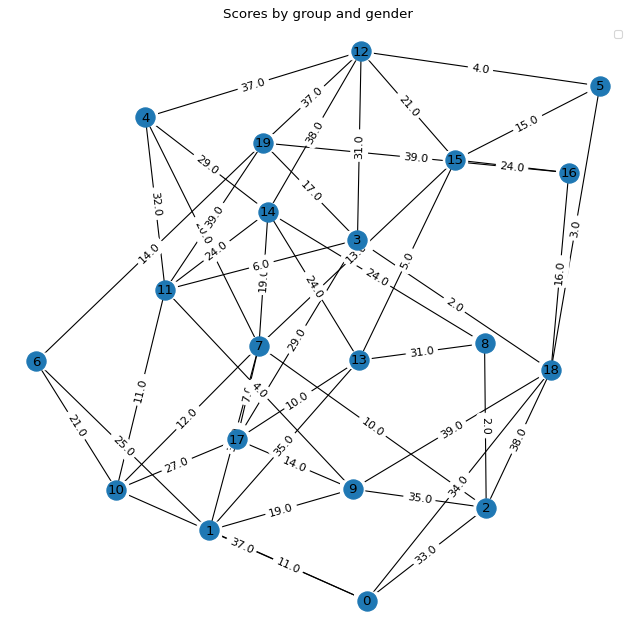

In [567]:


# !pip install matplotlib==2.2.3.
import networkx as nx
import matplotlib.pyplot as plt
from itertools import cycle
from matplotlib import colors
col = cycle(colors.TABLEAU_COLORS)

%matplotlib inline

G=  nx.Graph()
fig, ax = plt.subplots(figsize=(10,10), dpi=80)
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender') 
ax.grid()
ax.legend()
mt = Matrix(matrix_path= 'data_20_nodes.txt', shortest_path= 'shortest.txt')  
# a = mt.trace(is_print=False)   
values = []
_labels = []
 
for vertex, edges in mt.edges.items():
    G.add_node("%s" % vertex)
    # x+=2
    for edge in edges:
        G.add_node("%s" % edge)
        G.add_edge("%s" % vertex, "%s" % edge)
        for item in mt.list_edge:
          if item.x == vertex and item.y == edge:
            _labels.append(item.weight)
            continue
        # print("'%s' it connects with '%s'" % (vertex,edge),_labels[-1])
# ---- END OF UNCHANGED CODE ----

# Create positions of all nodes and save them
pos = nx.spring_layout(G)

# Draw the graph according to node positions
nx.draw(G, pos, with_labels=True)

# Create edge labels
labels = {e: str(mt.matrix_edge[int(e[0]),int(e[1])]) for index, e in enumerate(G.edges)}
print(labels)
# Draw edge labels according to node positions
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

 

In [0]:
new_list = []
for item in list_path:
  if item not in new_list:
    new_list.append(item)

for i in range(10):
  new_list.extend(new_list)

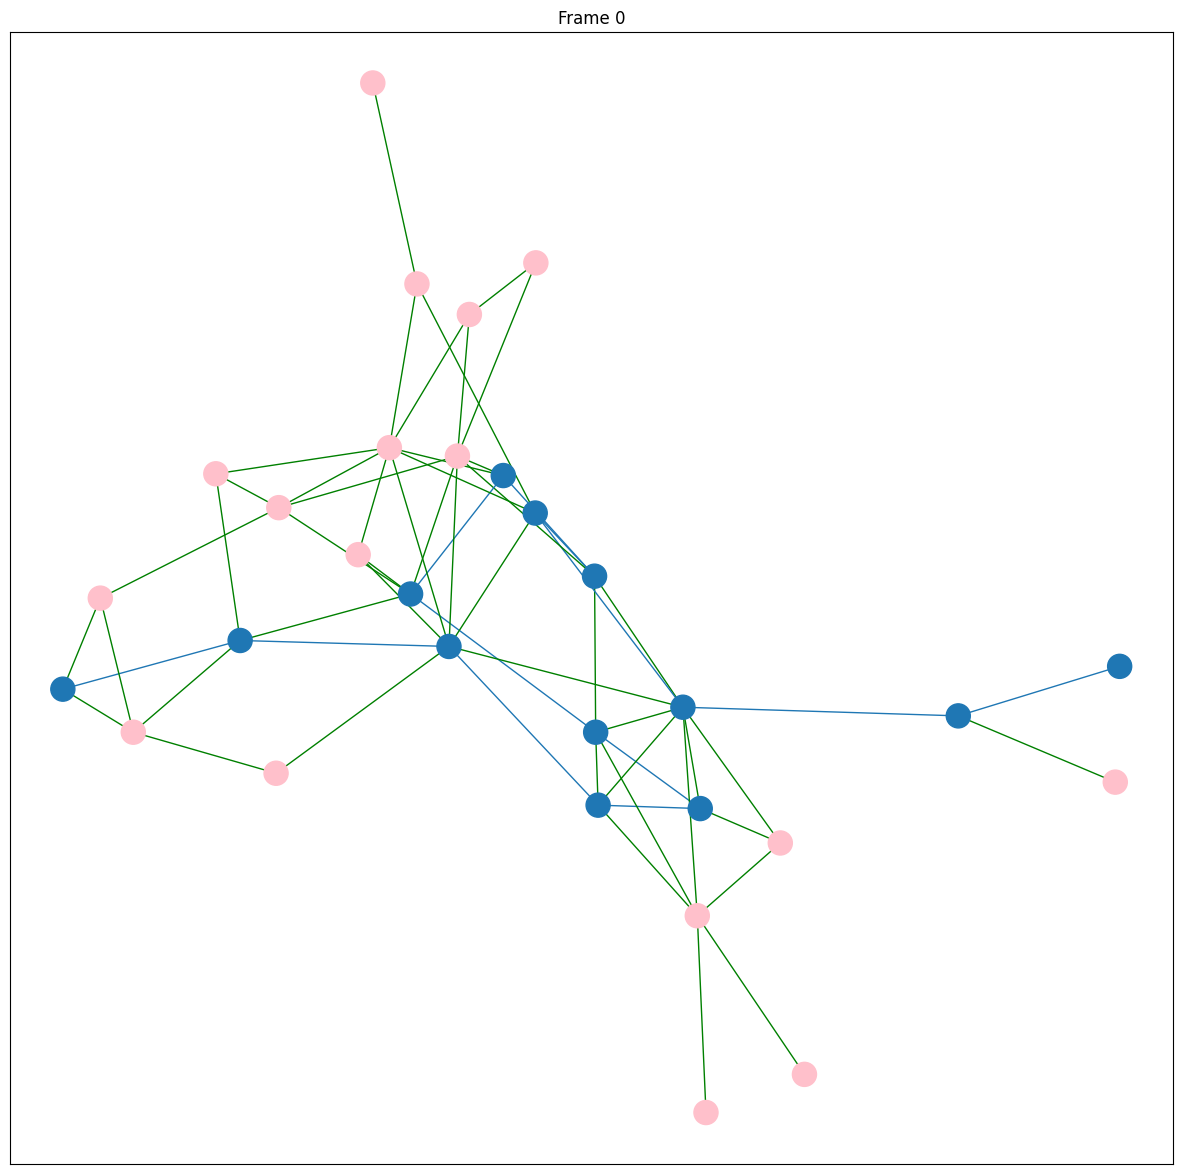

In [16]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import animation 

# fig1 = plt.figure()
count = 0
def simple_update(num, n, layout, G, ax, list_path):
    global count
    if count <= len(list_path) -1:
      ax.clear()

      # Draw the graph with random node colors
      # random_colors = np.random.randint(2, size=n)
      draw(layout, G, ax, list_path[count])
      # nx.draw(G, pos=layout, node_color=random_colors, ax=ax)

      # Set the title
      count+=1
      ax.set_title("Frame {}".format(num))
  

def draw(layout, G , ax, path):  
  values = ['pink'] * len(G.nodes) 
  values_edge = ['green'] * len(G.edges)
  from matplotlib import colors
  col = cycle(colors.TABLEAU_COLORS) 
  color = next(col) 
  for item in path:
    for index, node in enumerate(G.nodes):
      if str(item) == str(node):
        values[index] = color
      
  for index, item in enumerate(path[:-1]):    
    for i, edge in enumerate(G.edges): 
      if (str(edge[0]) == str(path[index + 1]) and edge[1] == str(item)):
        values_edge[i] = color 
      if  str(edge[1]) == str(path[index + 1]) and edge[0] == str(item):
        values_edge[i] = color  
  nx.draw_networkx_edges(G, pos=layout,edge_color=values_edge,ax=ax)
  nx.draw_networkx_nodes(G, pos=layout, node_color = values,ax=ax)

def simple_animation(new_list):
    # dpi = len(new_list) -1
    Writer = animation.writers['ffmpeg'] 
    writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800,)
    # Build plot
    fig, ax = plt.subplots(figsize=(15,15),dpi=100)

    # Create a graph and layout
    # n = 30 # Number of nodes
    # m = 70 # Number of edges
    # G = nx.gnm_random_graph(n, m)
    layout = nx.spring_layout(G) 

    
    ani = animation.FuncAnimation(fig, simple_update, frames=50,interval=1050, repeat= True,fargs=(30, layout, G, ax, new_list))
    ani.save('animation_1.mp4', writer=writer, dpi=10)
    plt.show()

simple_animation(new_list)


In [566]:


import random
import pandas as pd
reader = pd.read_csv('/content/drive/My Drive/AI/Genetic Graph/100_nodes.tsv')

NUM_NODE = 20
x_list = {}
y_list = {}
matrix = np.zeros((100,100))
for item in reader.values:
  a = ''.join(np.array(item))
  vertex = a.split('\t')
  x, y, value = vertex 
  if int(x) -1 < 100 and int(y) -1 < 100:
    value = random.randint(1,40)
    if value == 0: 
      value = -1 
    if int(x)-1 < NUM_NODE:
      if int(x)-1 not in x_list.keys():
        x_list[int(x)-1] = 0
      elif int(y)-1 < NUM_NODE:

        if x_list[int(x)-1] < 3:
          matrix[int(x)-1, int(y)-1] = value
          matrix[int(y)-1, int(x)-1] = value

          x_list[int(x)-1] += 1
   
  
print(matrix)
# tăng cạnh lên 
print(x_list)
check = [False] * NUM_NODE
while True: 
  y = random.randint(1,NUM_NODE)  
  count = 0   
  sort = list(filter(lambda x: x[1] < 3,list(x_list.items())))
  if len(sort) > 0:
    x  = list(random.choice(sort))[0]
    print(x_list)
    while x == y:
      y = random.randint(0,NUM_NODE) 
    value = random.randint(0,40)
    matrix[int(x), int(y)] = value
    matrix[int(y), int(x)] = value 
    x_list[x] +=1
    if x_list[x] > 6:
      check[x] = True
  else:
    break

print(x_list)
with open('data_20_nodes.txt', 'w') as f:
  f.write(str(random.randint(0,NUM_NODE-1))+'\n')
  f.write(str(random.randint(0,NUM_NODE-1))+'\n')
  for i in range(0,NUM_NODE):
    for j in range(0,NUM_NODE):
      if int(matrix[i,j]) == 0 and i != j:
        f.write(str(-1) + ' ')  
      else:
        f.write(str(int(matrix[i,j])) + ' ')
    f.write('\n')


[[ 0. 11. 33. ...  0.  0.  0.]
 [11.  0.  0. ...  0.  0.  0.]
 [33.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
{0: 2, 1: 2, 2: 3, 3: 1, 4: 1, 5: 0, 6: 2, 7: 3, 8: 1, 9: 1, 10: 0, 11: 0, 12: 3, 13: 1, 14: 1, 15: 0, 16: 0, 17: 0, 18: 3, 19: 0}
{0: 2, 1: 2, 2: 3, 3: 1, 4: 1, 5: 0, 6: 2, 7: 3, 8: 1, 9: 1, 10: 0, 11: 0, 12: 3, 13: 1, 14: 1, 15: 0, 16: 0, 17: 0, 18: 3, 19: 0}
{0: 2, 1: 2, 2: 3, 3: 1, 4: 1, 5: 0, 6: 2, 7: 3, 8: 1, 9: 1, 10: 0, 11: 0, 12: 3, 13: 1, 14: 2, 15: 0, 16: 0, 17: 0, 18: 3, 19: 0}
{0: 3, 1: 2, 2: 3, 3: 1, 4: 1, 5: 0, 6: 2, 7: 3, 8: 1, 9: 1, 10: 0, 11: 0, 12: 3, 13: 1, 14: 2, 15: 0, 16: 0, 17: 0, 18: 3, 19: 0}
{0: 3, 1: 3, 2: 3, 3: 1, 4: 1, 5: 0, 6: 2, 7: 3, 8: 1, 9: 1, 10: 0, 11: 0, 12: 3, 13: 1, 14: 2, 15: 0, 16: 0, 17: 0, 18: 3, 19: 0}
{0: 3, 1: 3, 2: 3, 3: 1, 4: 1, 5: 1, 6: 2, 7: 3, 8: 1, 9: 1, 10: 0, 11: 0, 12: 3, 13: 1, 14: 2, 15: 0, 16: 0, 17: 0, 18: 3, 19: 0}
{0: 3, 1: 3, 2: 3, 3: 